In [9]:
# Importing necessary libraries
from sklearn.feature_selection import VarianceThreshold
import pandas as pd

# Reading the CSV file
df = pd.read_csv(r"C:\MAJOR PROJECT\NOTEBOOKmajorProject\featureAnalysis+classification\read+spon_final.csv")

# Separating features and labels
X = df.drop(['labels'], axis=1)
y = df['labels']

# Creating a VarianceThreshold object with the desired threshold
vth = VarianceThreshold(threshold=5)

# Fitting the VarianceThreshold object to the features and transforming the features
X_vth = X.iloc[:, vth.fit(X).get_support()]

# Writing the selected features to a new CSV file
selected_features_csv = r"C:\MAJOR PROJECT\NOTEBOOKmajorProject\featureAnalysis+classification\variance_read+spon.csv"
X_vth.to_csv(selected_features_csv, index=False)


code from kaggle 

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.metrics import accuracy_score

In [2]:
parkinson_data=pd.read_csv(r"C:\MAJOR PROJECT\NOTEBOOKmajorProject\featureAnalysis+classification\all_read_binary.csv")
parkinson_data.head(10)

,Tonal_Centroid_1,Tonal_Centroid_2,Tonal_Centroid_3,Tonal_Centroid_4,Tonal_Centroid_5,Tonal_Centroid_6,Chroma_1,Chroma_2,Chroma_3,Chroma_4,...,STFT_9,STFT_10,STFT_11,STFT_12,STFT_13,Spectral_Bandwidth_1,Spectral_Centroid_1,RMS_1,Zero_Crossing_Rate_1,labels
0,-0.022587,-0.017720,-0.071584,0.083063,0.011173,-0.001053,0.545811,0.503879,0.396175,0.287503,...,0.665078,0.686014,0.453671,0.635257,1.376897,2819.851463,1774.964682,0.007420,0.038931,0
1,-0.049659,0.016326,-0.039835,0.043780,0.010097,-0.013023,0.582100,0.506595,0.612141,0.708112,...,0.804552,0.654988,0.363748,0.544499,0.531876,3036.078734,2151.383955,0.005866,0.053177,0
2,0.005533,-0.016840,-0.007258,0.025546,0.001193,-0.007298,0.377310,0.406142,0.452342,0.400512,...,0.719236,0.695718,0.486786,0.664633,0.797937,2468.673587,2202.687091,0.047006,0.108733,0
3,-0.029580,0.008680,-0.098302,-0.006046,-0.025011,-0.002446,0.366327,0.448181,0.417598,0.382876,...,0.757945,0.757571,0.446334,0.687395,1.596812,2400.587367,2220.592116,0.039822,0.099722,0
4,-0.022825,0.024899,-0.090781,0.033311,-0.024570,-0.013024,0.455565,0.406547,0.429834,0.475643,...,0.832564,0.759616,0.541247,0.918006,1.714429,2446.990672,2146.488041,0.034828,0.102969,0
5,-0.026170,0.003201,-0.014377,0.084256,-0.001194,-0.018219,0.374887,0.369113,0.370431,0.417679,...,0.680588,0.585865,0.452777,1.012662,1.800888,2279.472438,1576.573799,0.049182,0.050343,0
6,0.005132,0.018097,0.024453,0.050465,-0.012623,-0.018425,0.405605,0.388905,0.491098,0.500188,...,0.713196,0.606372,0.537780,1.056945,1.857864,2304.336177,1928.750910,0.036949,0.099275,0
7,-0.007613,0.005481,-0.085955,0.014000,-0.022135,-0.021109,0.222834,0.337576,0.337923,0.273616,...,0.746141,0.609415,0.467781,0.733380,1.822213,2265.510251,1505.669135,0.049343,0.049136,0
8,0.001597,0.012555,-0.003085,0.140810,-0.006646,-0.011211,0.436432,0.391281,0.366079,0.459626,...,0.687162,0.668408,0.554691,1.135032,2.253182,2167.698109,1814.681454,0.037191,0.083401,0
9,-0.013907,-0.020480,-0.011704,-0.035497,-0.010227,0.024386,0.277351,0.355696,0.420362,0.427877,...,0.655766,0.595133,0.426356,0.720453,1.251294,2236.868412,1998.557965,0.038692,0.089667,0


In [3]:
parkinson_data.shape

(1905, 197)

In [4]:
parkinson_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1905 entries, 0 to 1904
Columns: 197 entries, Tonal_Centroid_1 to labels
dtypes: float64(196), int64(1)
memory usage: 2.9 MB


In [5]:
parkinson_data.isnull().sum()

Tonal_Centroid_1        0
Tonal_Centroid_2        0
Tonal_Centroid_3        0
Tonal_Centroid_4        0
Tonal_Centroid_5        0
                       ..
Spectral_Bandwidth_1    0
Spectral_Centroid_1     0
RMS_1                   0
Zero_Crossing_Rate_1    0
labels                  0
Length: 197, dtype: int64

In [6]:
parkinson_data.describe()

,Tonal_Centroid_1,Tonal_Centroid_2,Tonal_Centroid_3,Tonal_Centroid_4,Tonal_Centroid_5,Tonal_Centroid_6,Chroma_1,Chroma_2,Chroma_3,Chroma_4,...,STFT_9,STFT_10,STFT_11,STFT_12,STFT_13,Spectral_Bandwidth_1,Spectral_Centroid_1,RMS_1,Zero_Crossing_Rate_1,labels
count,1905.000000,1905.000000,1905.000000,1905.000000,1905.000000,1905.000000,1905.000000,1905.000000,1905.000000,1905.000000,...,1905.000000,1905.000000,1905.000000,1905.000000,1905.000000,1905.000000,1905.000000,1905.000000,1905.000000,1905.000000
mean,-0.006154,0.001567,-0.003983,-0.000553,0.000694,-0.003233,0.443717,0.417451,0.423142,0.428957,...,0.474031,0.649084,0.983470,1.404624,1.424447,2564.549352,2388.723389,0.020335,0.107096,0.355906
std,0.023888,0.025948,0.041284,0.051204,0.014295,0.013852,0.133221,0.121246,0.127337,0.129520,...,0.720789,1.170122,1.786630,2.380795,2.240344,285.686164,508.344521,0.012956,0.044676,0.478912
min,-0.085147,-0.160790,-0.159445,-0.169273,-0.053302,-0.052607,0.077793,0.116679,0.114382,0.132908,...,0.026273,0.030134,0.042209,0.046418,0.039438,1195.322405,332.097191,0.000425,0.003350,0.000000
25%,-0.022015,-0.014352,-0.031169,-0.036474,-0.008307,-0.012409,0.343916,0.328213,0.332803,0.335300,...,0.148818,0.151297,0.173115,0.258830,0.249651,2375.806708,2027.901140,0.010860,0.071990,0.000000
50%,-0.006106,0.000828,-0.005697,-0.000620,0.001183,-0.003782,0.429986,0.405063,0.411837,0.417962,...,0.282999,0.291258,0.304525,0.461718,0.483192,2545.948761,2368.022761,0.018956,0.102819,0.000000
75%,0.009111,0.017388,0.023459,0.034883,0.010311,0.005382,0.526940,0.497927,0.504451,0.511917,...,0.513856,0.608340,0.663756,0.956822,1.322154,2733.131578,2736.172722,0.029119,0.139327,1.000000
max,0.101142,0.106576,0.128853,0.165655,0.047773,0.069018,0.850636,0.837208,0.891533,0.892536,...,7.713754,11.414866,16.003061,18.535498,16.279606,3573.782620,4255.513826,0.076924,0.295424,1.000000


In [7]:
parkinson_data['labels'].value_counts()

labels
0    1227
1     678
Name: count, dtype: int64

In [8]:
parkinson_data.groupby('labels').mean()

,Tonal_Centroid_1,Tonal_Centroid_2,Tonal_Centroid_3,Tonal_Centroid_4,Tonal_Centroid_5,Tonal_Centroid_6,Chroma_1,Chroma_2,Chroma_3,Chroma_4,...,STFT_8,STFT_9,STFT_10,STFT_11,STFT_12,STFT_13,Spectral_Bandwidth_1,Spectral_Centroid_1,RMS_1,Zero_Crossing_Rate_1
labels,,,,,,,,,,,,,,,,,,,,,
0,-0.005581,0.002164,-0.002445,-0.002306,0.000950,-0.002520,0.424644,0.405901,0.417771,0.430189,...,0.320378,0.317285,0.338741,0.403365,0.645243,0.824857,2565.490407,2491.365351,0.018442,0.116557
1,-0.007192,0.000488,-0.006764,0.002621,0.000232,-0.004523,0.478234,0.438355,0.432860,0.426728,...,0.524263,0.757698,1.210723,2.033306,2.778901,2.509546,2562.846294,2202.968687,0.023760,0.089974


In [9]:
x=parkinson_data.drop(columns=['labels'],axis=1)
y=parkinson_data['labels']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)
print(x.shape,x_train.shape,x_test.shape)

(1905, 196) (1524, 196) (381, 196)


In [10]:
scaler=StandardScaler()
scaler.fit(x_train)
x_train=scaler.transform(x_train)
x_test=scaler.transform(x_test)

In [11]:
model=svm.SVC(kernel='linear')

In [23]:
#training the svm model with training data
model.fit(x_train,y_train)

SVC(kernel='linear')

In [12]:
## accuracy score on training data
x_train_prediction=model.predict(x_train)
training_data_accuracy=accuracy_score(y_train,x_train_prediction)

NotFittedError: This SVC instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [25]:
print("Accuracy score of training data: ",training_data_accuracy)

Accuracy score of training data:  0.8870038412291933


In [26]:
## accuracy score on test data
x_test_prediction=model.predict(x_test)
test_data_accuracy=accuracy_score(y_test,x_test_prediction)
print("Accuracy score of test data: ",test_data_accuracy)

Accuracy score of test data:  0.8156209987195903


another code from kaggle

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [32]:
sns.set(style="whitegrid", color_codes=True)
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = 3*cm.max()/4
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [34]:
data = pd.read_csv(r"C:\MAJOR PROJECT\NOTEBOOKmajorProject\featureAnalysis+classification\read+spon_final.csv", sep=',') # assign index column to name 
data.head()

,Tonal_Centroid_1,Tonal_Centroid_2,Tonal_Centroid_3,Tonal_Centroid_4,Tonal_Centroid_5,Tonal_Centroid_6,Chroma_1,Chroma_2,Chroma_3,Chroma_4,...,STFT_9,STFT_10,STFT_11,STFT_12,STFT_13,Spectral_Bandwidth_1,Spectral_Centroid_1,RMS_1,Zero_Crossing_Rate_1,labels
0,-0.022587,-0.017720,-0.071584,0.083063,0.011173,-0.001053,0.545811,0.503879,0.396175,0.287503,...,0.665078,0.686014,0.453671,0.635257,1.376897,2819.851463,1774.964682,0.007420,0.038931,0
1,-0.049659,0.016326,-0.039835,0.043780,0.010097,-0.013023,0.582100,0.506595,0.612141,0.708112,...,0.804552,0.654988,0.363748,0.544499,0.531876,3036.078734,2151.383955,0.005866,0.053177,0
2,0.005533,-0.016840,-0.007258,0.025546,0.001193,-0.007298,0.377310,0.406142,0.452342,0.400512,...,0.719236,0.695718,0.486786,0.664633,0.797937,2468.673587,2202.687091,0.047006,0.108733,0
3,-0.029580,0.008680,-0.098302,-0.006046,-0.025011,-0.002446,0.366327,0.448181,0.417598,0.382876,...,0.757945,0.757571,0.446334,0.687395,1.596812,2400.587367,2220.592116,0.039822,0.099722,0
4,-0.022825,0.024899,-0.090781,0.033311,-0.024570,-0.013024,0.455565,0.406547,0.429834,0.475643,...,0.832564,0.759616,0.541247,0.918006,1.714429,2446.990672,2146.488041,0.034828,0.102969,0


In [35]:
print(data.shape)

(3905, 197)


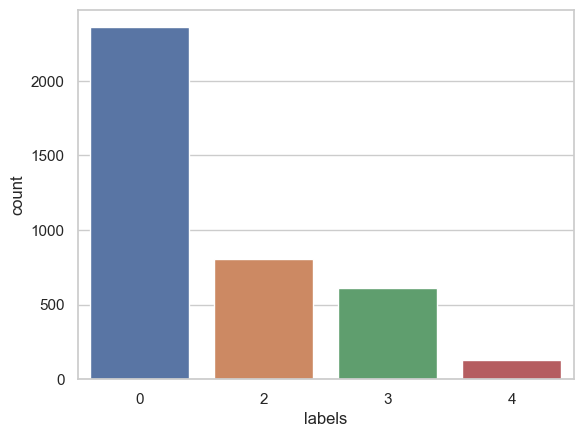

In [61]:
ax = sns.countplot(x="labels", data=data)

C:\Users\DELL\AppData\Local\Temp\ipykernel_19752\830937186.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(data.corr(), dtype=np.bool))


<AxesSubplot:>

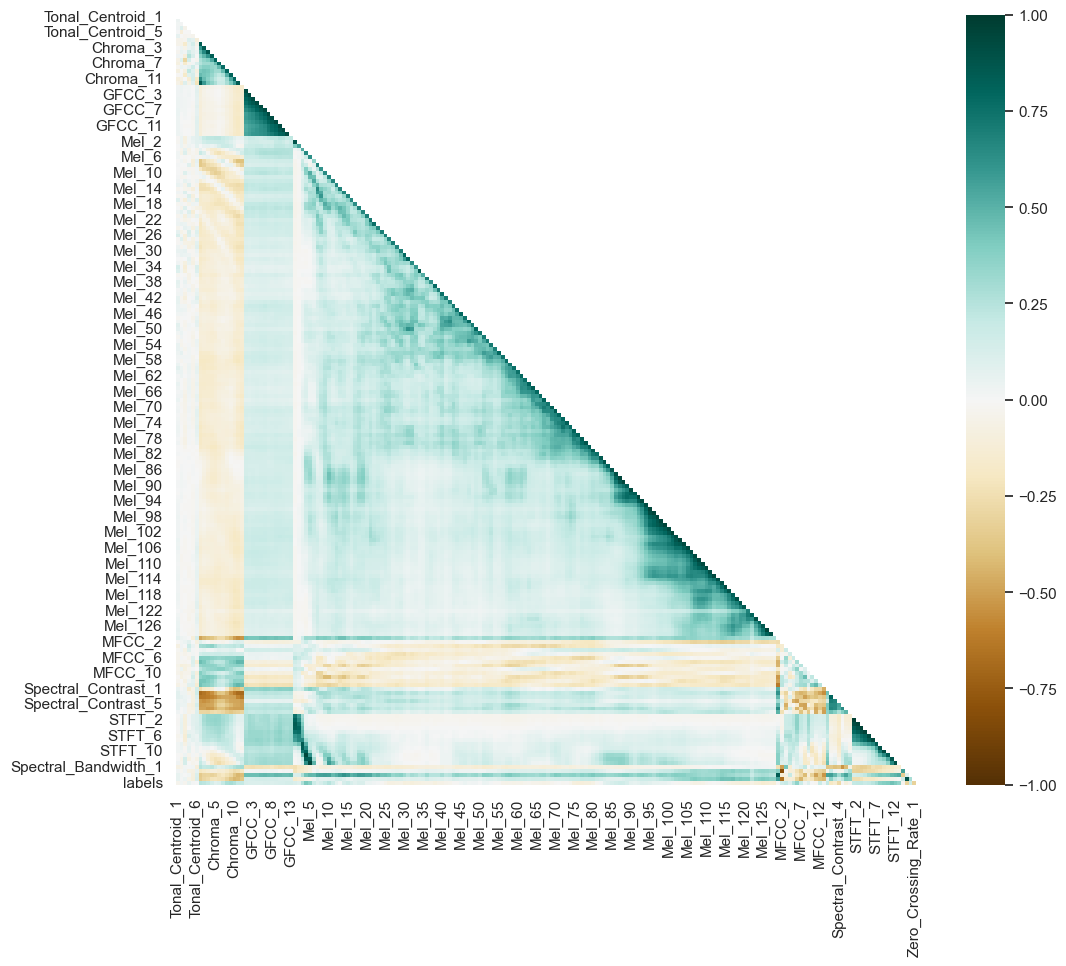

In [36]:
# creating the correlation matrix
plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(data.corr(), dtype=np.bool))
sns.heatmap(data.corr(),vmin=-1, vmax=1,cmap='BrBG', mask=mask)

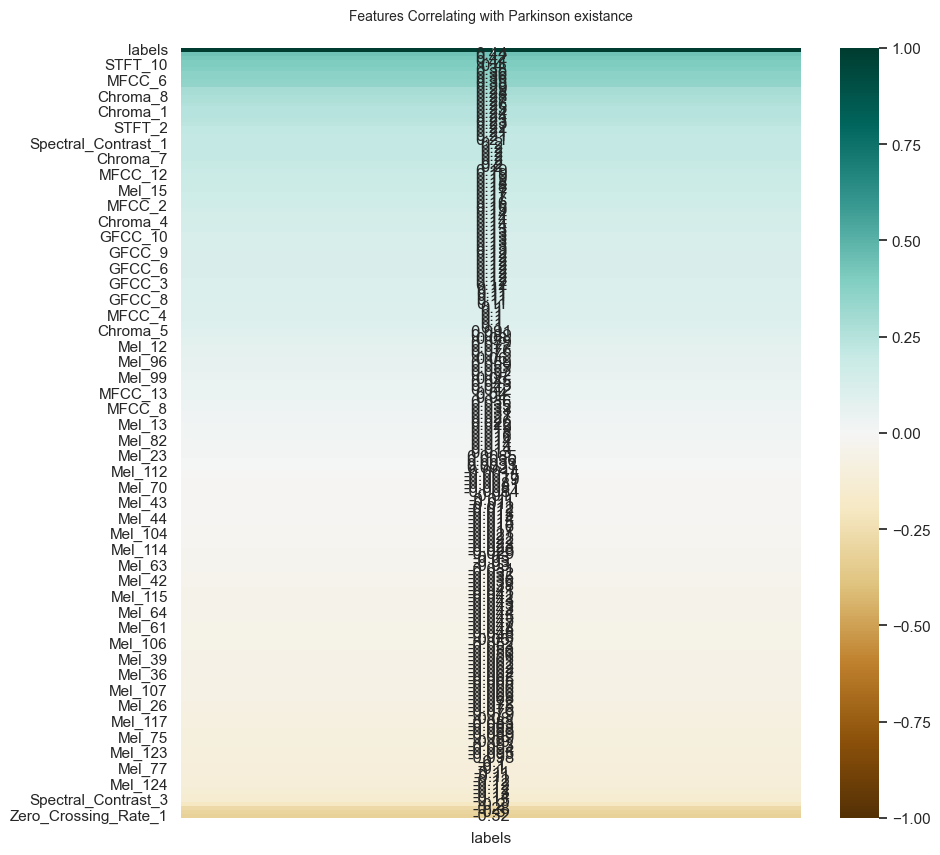

In [41]:
# modify the headmap plot to show correlation variables to the status 
plt.figure(figsize=(10, 10))
heatmap = sns.heatmap(data.corr()[['labels']].sort_values(by='labels', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Parkinson existance', fontdict={'fontsize':10}, pad=20);

In [43]:
X = data.drop('labels', axis=1)
X.head()

,Tonal_Centroid_1,Tonal_Centroid_2,Tonal_Centroid_3,Tonal_Centroid_4,Tonal_Centroid_5,Tonal_Centroid_6,Chroma_1,Chroma_2,Chroma_3,Chroma_4,...,STFT_8,STFT_9,STFT_10,STFT_11,STFT_12,STFT_13,Spectral_Bandwidth_1,Spectral_Centroid_1,RMS_1,Zero_Crossing_Rate_1
0,-0.022587,-0.017720,-0.071584,0.083063,0.011173,-0.001053,0.545811,0.503879,0.396175,0.287503,...,0.505537,0.665078,0.686014,0.453671,0.635257,1.376897,2819.851463,1774.964682,0.007420,0.038931
1,-0.049659,0.016326,-0.039835,0.043780,0.010097,-0.013023,0.582100,0.506595,0.612141,0.708112,...,0.628563,0.804552,0.654988,0.363748,0.544499,0.531876,3036.078734,2151.383955,0.005866,0.053177
2,0.005533,-0.016840,-0.007258,0.025546,0.001193,-0.007298,0.377310,0.406142,0.452342,0.400512,...,0.479981,0.719236,0.695718,0.486786,0.664633,0.797937,2468.673587,2202.687091,0.047006,0.108733
3,-0.029580,0.008680,-0.098302,-0.006046,-0.025011,-0.002446,0.366327,0.448181,0.417598,0.382876,...,0.517700,0.757945,0.757571,0.446334,0.687395,1.596812,2400.587367,2220.592116,0.039822,0.099722
4,-0.022825,0.024899,-0.090781,0.033311,-0.024570,-0.013024,0.455565,0.406547,0.429834,0.475643,...,0.611337,0.832564,0.759616,0.541247,0.918006,1.714429,2446.990672,2146.488041,0.034828,0.102969


In [45]:
y=data['labels']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: labels, dtype: int64

In [48]:
y.value_counts()

labels
0    2358
2     804
3     611
4     132
Name: count, dtype: int64

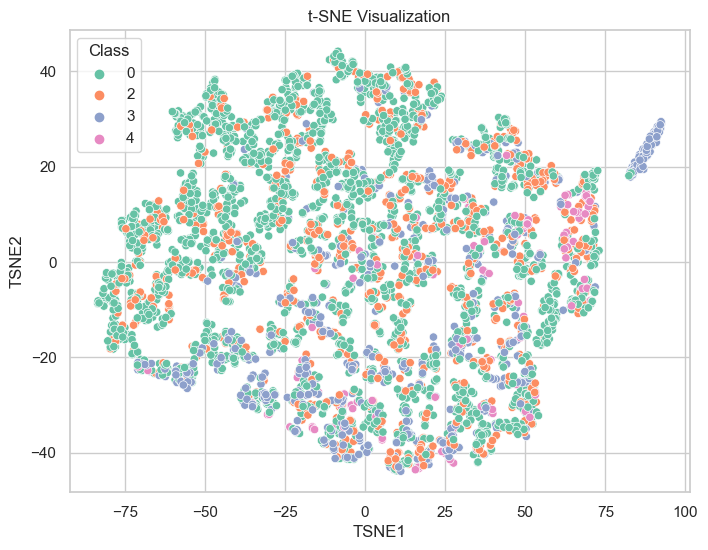

In [49]:
import seaborn as sns
from sklearn.manifold import TSNE

# Apply t-SNE to reduce the dimensions to 2
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

# Create a DataFrame with the t-SNE-transformed data and class labels
tsne_df = pd.DataFrame(data=X_tsne, columns=['TSNE1', 'TSNE2'])
tsne_df['Class'] = y.values

# Visualize the data based on class using a scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=tsne_df, x='TSNE1', y='TSNE2', hue='Class', palette='Set2')
plt.title('t-SNE Visualization')
plt.show()

In [50]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=11)


# print the shape of train and test data
print("X_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape)
print("X_test shape: ", X_test.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (2733, 196)
y_train shape:  (2733,)
X_test shape:  (1172, 196)
y_test shape:  (1172,)


In [57]:
from sklearn.linear_model import LogisticRegression

c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Confusion matrix, without normalization
[[665  13  31   5]
 [183  44  11   7]
 [ 81  29  60   7]
 [  4  11   4  17]]

Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.93      0.81       714
           2       0.45      0.18      0.26       245
           3       0.57      0.34      0.42       177
           4       0.47      0.47      0.47        36

    accuracy                           0.67      1172
   macro avg       0.55      0.48      0.49      1172
weighted avg       0.63      0.67      0.62      1172


Accuracy Score: 0.6706484641638225


TypeError: only size-1 arrays can be converted to Python scalars

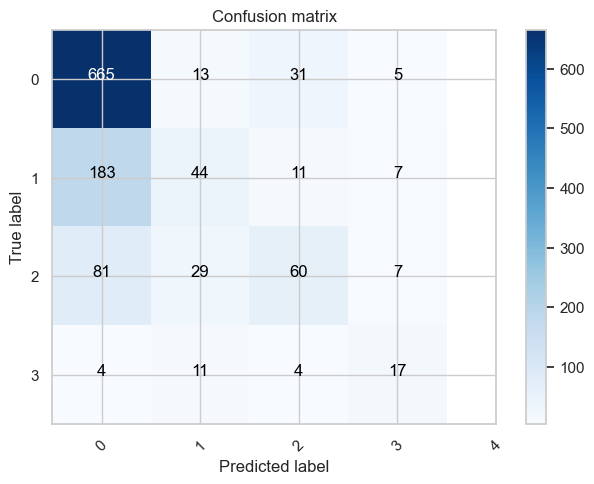

In [59]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(multi_class='multinomial', solver='lbfgs')
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

# Plot Confusion Matrix, Print Classification Report and Accuracy Score for lr
plot_confusion_matrix(confusion_matrix(y_test, y_pred), classes=[0, 1, 2, 3, 4], title='Confusion matrix')
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))

# Get absolute coefficients and plot feature importance
coef = abs(lr.coef_)
plt.barh(X.columns, coef)
plt.show()

# Select top features
best_columns = X.columns[np.argsort(-1 * coef)[:5]]

# Train logistic regression on selected features
log_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=10000)
log_reg.fit(X_train[best_columns], y_train)

# Get the predicted probabilities for each class using selected features
y_pred_proba = log_reg.predict_proba(X_test[best_columns])

# Plot Confusion Matrix, Print Classification Report and Accuracy Score for log_reg
plot_confusion_matrix(confusion_matrix(y_test, y_pred), classes=[0, 1, 2, 3, 4], title='Confusion matrix')
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))


genetic algo 

In [96]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from random import randint
%matplotlib inline 
 

In [97]:
def initilization_of_population(size,n_feat):
    population = []
    for i in range(size):
        chromosome = np.ones(n_feat,dtype=np.bool)     
        chromosome[:int(0.3*n_feat)]=False             
        np.random.shuffle(chromosome)
        population.append(chromosome)
    return population


def fitness_score(population):
    scores = []
    for chromosome in population:
        logmodel.fit(X_train.iloc[:,chromosome],Y_train)         
        predictions = logmodel.predict(X_test.iloc[:,chromosome])
        scores.append(accuracy_score(Y_test,predictions))
    scores, population = np.array(scores), np.array(population) 
    inds = np.argsort(scores)                                    
    return list(scores[inds][::-1]), list(population[inds,:][::-1]) 


def selection(pop_after_fit,n_parents):
    population_nextgen = []
    for i in range(n_parents):
        population_nextgen.append(pop_after_fit[i])
    return population_nextgen


def crossover(pop_after_sel):
    pop_nextgen = pop_after_sel
    for i in range(0,len(pop_after_sel),2):
        new_par = []
        child_1 , child_2 = pop_nextgen[i] , pop_nextgen[i+1]
        new_par = np.concatenate((child_1[:len(child_1)//2],child_2[len(child_1)//2:]))
        pop_nextgen.append(new_par)
    return pop_nextgen


def mutation(pop_after_cross,mutation_rate,n_feat):   
    mutation_range = int(mutation_rate*n_feat)
    pop_next_gen = []
    for n in range(0,len(pop_after_cross)):
        chromo = pop_after_cross[n]
        rand_posi = [] 
        for i in range(0,mutation_range):
            pos = randint(0,n_feat-1)
            rand_posi.append(pos)
        for j in rand_posi:
            chromo[j] = not chromo[j]  
        pop_next_gen.append(chromo)
    return pop_next_gen

def generations(df,label,size,n_feat,n_parents,mutation_rate,n_gen,X_train,
                                   X_test, Y_train, Y_test):
    best_chromo= []
    best_score= []
    population_nextgen=initilization_of_population(size,n_feat)
    for i in range(n_gen):
        scores, pop_after_fit = fitness_score(population_nextgen)
        print('Best score in generation',i+1,':',scores[:1])  #2
        pop_after_sel = selection(pop_after_fit,n_parents)
        pop_after_cross = crossover(pop_after_sel)
        population_nextgen = mutation(pop_after_cross,mutation_rate,n_feat)
        best_chromo.append(pop_after_fit[0])
        best_score.append(scores[0])
    return best_chromo,best_score


In [98]:
data_pd = pd.read_csv(r"C:\MAJOR PROJECT\NOTEBOOKmajorProject\featureAnalysis+classification\read+spon_final.csv")
label_pd = data_pd["labels"]
data_pd.drop(["labels"],axis = 1,inplace = True)

print("Parkinson's disease dataset:\n",data_pd.shape[0],"Records\n",data_pd.shape[1],"Features")

Parkinson's disease dataset:
 3905 Records
 196 Features


In [99]:
score3 = acc_score(data_pd,label_pd)
score3

,Classifier,Accuracy
0,GradientBoosting,0.890481
1,RandomForest,0.883316
2,LinearSVM,0.810645
3,DecisionTree,0.771750
4,Logistic,0.767656
5,RadialSVM,0.636643
6,AdaBoost,0.586489


In [105]:
logmodel = DecisionTreeClassifier(random_state=0)
X_train,X_test, Y_train, Y_test = split(data_pd,label_pd)
chromo_df_pd,score_pd=generations(data_pd,label_pd,size=80,n_feat=data_pd.shape[1],n_parents=64,mutation_rate=0.20,n_gen=5,
                         X_train = X_train,X_test = X_test,Y_train = Y_train,Y_test = Y_test)

Best score in generation 1 : [0.7901740020470829]
Best score in generation 2 : [0.7942681678607983]
Best score in generation 3 : [0.7871033776867963]
Best score in generation 4 : [0.7963152507676561]
Best score in generation 5 : [0.7952917093142272]


In [ ]:
logmodel = GradientBoostingClassifier(random_state=0)
X_train,X_test, Y_train, Y_test = split(data_pd,label_pd)
chromo_df_pd,score_pd=generations(data_pd,label_pd,size=80,n_feat=data_pd.shape[1],n_parents=64,mutation_rate=0.20,n_gen=5,
                         X_train = X_train,X_test = X_test,Y_train = Y_train,Y_test = Y_test)

feature selection using correlation matrix


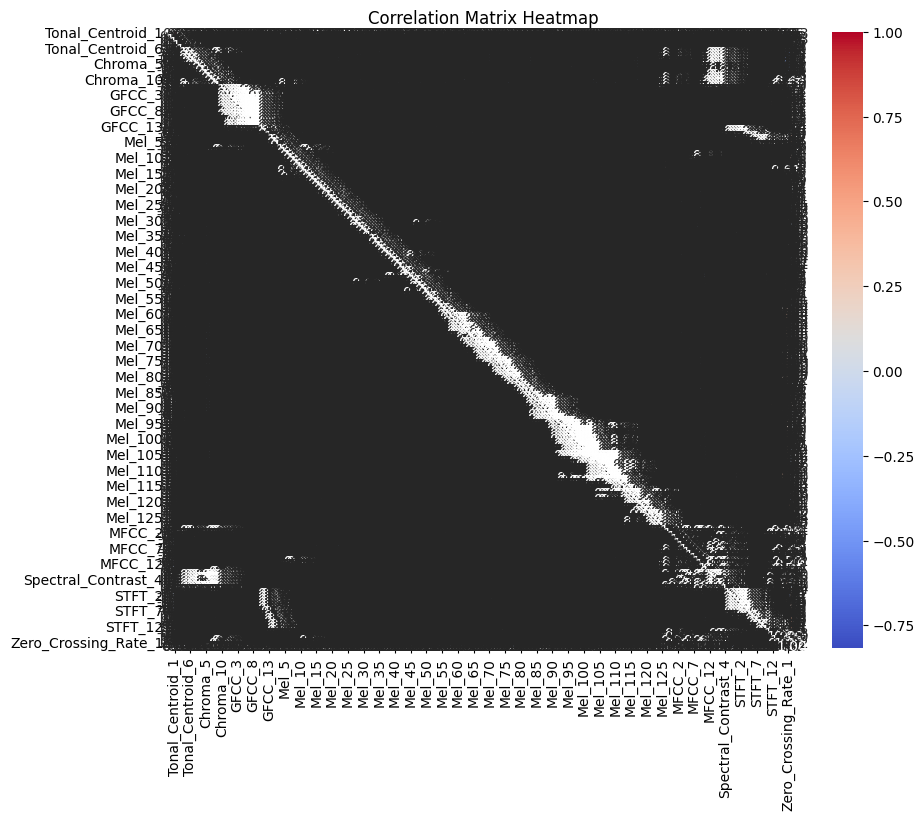

Execution Time: 210.38899850845337 seconds


In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time

# Load your data into a DataFrame
file_path = r"C:\MAJOR PROJECT\NOTEBOOKmajorProject\featureAnalysis+classification\read+spon_final.csv"
start_time = time.time()
df = pd.read_csv(file_path)

# Compute the correlation matrix
corr_matrix = df.corr()

# Plot a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()

# Set the correlation threshold
corr_threshold = 0.7

# Identify highly correlated features
high_corr_pairs = np.where(np.abs(corr_matrix) > corr_threshold)

# Perform feature selection
selected_features = set()
for i, j in zip(*high_corr_pairs):
    if i != j and i not in selected_features and j not in selected_features:
        feature_i = corr_matrix.columns[i]
        feature_j = corr_matrix.columns[j]
        corr_i = corr_matrix.iloc[i, i]
        corr_j = corr_matrix.iloc[j, j]
        if corr_i > corr_j:
            selected_features.add(feature_i)
        else:
            selected_features.add(feature_j)

# Drop redundant features
# Drop redundant features
selected_features_list = list(selected_features)
selected_features_df = df[selected_features_list]
# Concatenate the target column with the selected features
selected_features_df_with_target = pd.concat([selected_features_df, df['labels']], axis=1)

# Save selected features with target column to a CSV file
selected_features_df_with_target.to_csv('rough.csv', index=False)
execution_time = time.time() - start_time
print("Execution Time:", execution_time, "seconds")
